<a href="https://colab.research.google.com/github/maggyost/CPE_CienciaDatosPython_Mod1/blob/master/lineal_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
vehiculos = pd.read_csv("vehiculos_procesado.csv", usecols = ["consumo","co2","cilindros","desplazamiento"])

In [0]:
litros_por_galon = 3.78541
vehiculos["consumo_litros_milla"] = litros_por_galon/vehiculos.consumo

In [4]:
vehiculos.shape

(35539, 5)

In [5]:
vehiculos.head()

,desplazamiento,cilindros,consumo,co2,consumo_litros_milla
0,2.5,4.0,17,522.764706,0.222671
1,4.2,6.0,13,683.615385,0.291185
2,2.5,4.0,16,555.437500,0.236588
3,4.2,6.0,13,683.615385,0.291185
4,3.8,6.0,16,555.437500,0.236588


In [0]:
pct_entrenamiento = 0.8

In [0]:
vehiculos_training = vehiculos.sample(frac=pct_entrenamiento)

In [8]:
vehiculos_traning.shape

(28431, 5)

In [0]:
vehiculos_test = vehiculos[~vehiculos.index.isin(vehiculos_traning.index)]

In [10]:
vehiculos_test.shape 

(7108, 5)

In [0]:
variables_independientes = ["consumo_litros_milla","cilindros","desplazamiento"]

In [14]:
variables_dependiente = "co2"
X = vehiculos_training[variables_independientes].as_matrix()
Y = vehiculos_training[variables_dependiente].as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
X_T = X.T  # para hacer transpuesta

In [0]:
betas = np.linalg.inv(X_T @ X) @X_T @Y # la formula de betas 

In [18]:
betas

array([ 2.30632325e+03, -6.03050665e-01,  3.75306843e+00])

In [20]:
alfa = Y.mean() - np.dot(betas,vehiculos_training[variables_independientes].mean().as_matrix())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [21]:
alfa

0.36083328573641893

In [0]:
def predecir(r):
  return alfa + np.dot(betas,r.values)

In [0]:
vehiculos_training['co2_pred'] = vehiculos_training[variables_independientes].apply(predecir,axis=1)

In [26]:
vehiculos_test["co2_pred"] = vehiculos_test[variables_independientes].apply(predecir,axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
vehiculos_training.head()

,desplazamiento,cilindros,consumo,co2,consumo_litros_milla,co2_pred
2303,4.4,8.0,20,456.000000,0.189271,448.568884
30551,2.2,4.0,21,423.190476,0.180258,421.937719
29622,3.6,6.0,19,467.736842,0.199232,469.747212
21045,3.0,6.0,18,493.722222,0.210301,493.022795
17299,1.6,4.0,29,306.448276,0.130531,305.001095


In [28]:
vehiculos_test.head()

,desplazamiento,cilindros,consumo,co2,consumo_litros_milla,co2_pred
6,2.2,4.0,24,370.291667,0.157725,369.971177
7,3.0,6.0,20,444.350000,0.189271,444.520689
11,2.3,4.0,22,403.954545,0.172064,403.416101
12,2.3,4.0,24,370.291667,0.157725,370.346484
15,2.5,5.0,20,444.350000,0.189271,443.247206


In [0]:
modelo_formula = "y ~ {alfa:.3f} + {beta_1:.2f}*desplazamiento + {beta_2:.2f}*cilindros + {beta_3:.3f}*consumo_litros_milla".format(alfa=alfa, beta_1=betas[0],beta_2=betas[1],beta_3=betas[2])

In [35]:
modelo_formula

'y ~ 0.361 + 2306.32*desplazamiento + -0.60*cilindros + 3.753*consumo_litros_milla'

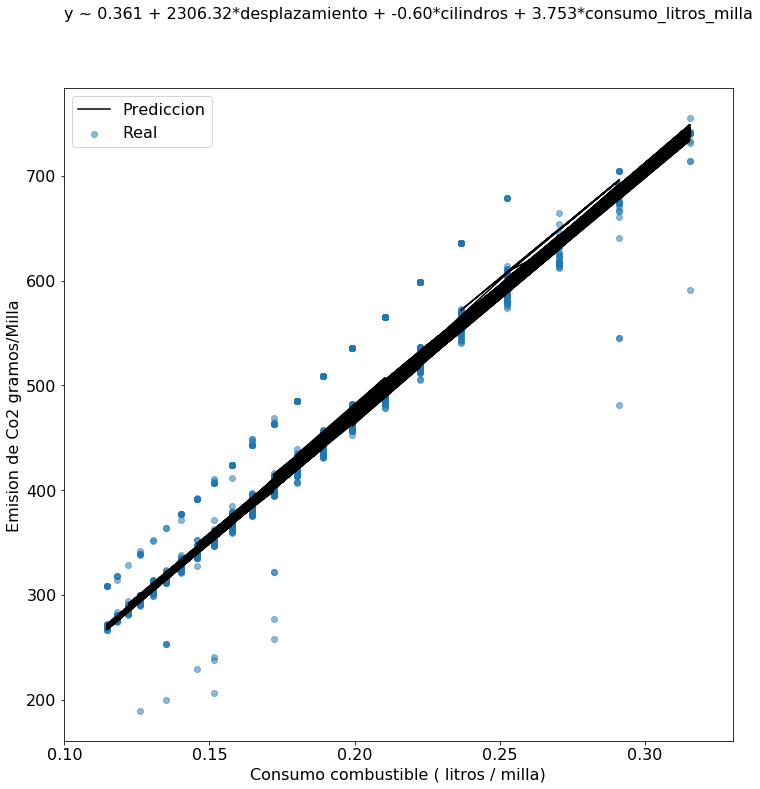

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 16
plt.scatter(vehiculos_test.consumo_litros_milla,vehiculos_test.co2,alpha=0.5,label="Real")
plt.text(0.1,850,modelo_formula)
plt.plot(vehiculos_test.consumo_litros_milla,vehiculos_test.co2_pred,c="black",label = "Prediccion")
plt.xlabel("Consumo combustible ( litros / milla)")
plt.ylabel("Emision de Co2 gramos/Milla")
plt.legend()

In [0]:
def error_cuadratico_medio(y, y_pred):
  return np.sum(y-y_pred)**2/len(y)



In [0]:
error_training = error_cuadratico_medio(vehiculos_training[vehiculos_training.co2,vehiculos_training.co2_pred])

In [0]:
error_test = error_cuadratico_medio(vehiculos_test.co2,vehiculos_test.co2_pred)

In [48]:
error_test

25.328883770362037